In [9]:
import pandas as pd
import os

from matplotlib.pyplot import semilogx

TESTDATA=os.path.join('..', 'test', 'testdata')
print(TESTDATA)

price_stats = pd.read_json(os.path.join(TESTDATA, 'price_stats.json'))

../test/testdata


In [14]:
price_stats['count'].describe()

count    2.101000e+03
mean     1.064878e+04
std      1.160650e+05
min      0.000000e+00
25%      0.000000e+00
50%      8.470000e+02
75%      3.930000e+03
max      4.740095e+06
Name: count, dtype: float64

In [16]:
per_sec = price_stats['count']/(24*3600)

In [17]:
per_sec.describe()

count    2101.000000
mean        0.123250
std         1.343345
min         0.000000
25%         0.000000
50%         0.009803
75%         0.045486
max        54.862211
Name: count, dtype: float64

<AxesSubplot:ylabel='Frequency'>

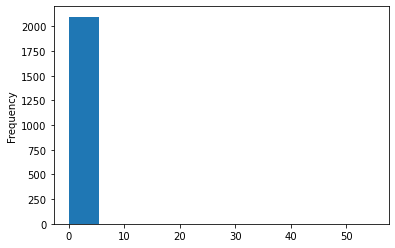

In [18]:
per_sec.plot.hist()

In [32]:
per_sec_0_1 = per_sec[(per_sec >= 0.5) &  (per_sec <= 5)]

<AxesSubplot:ylabel='Frequency'>

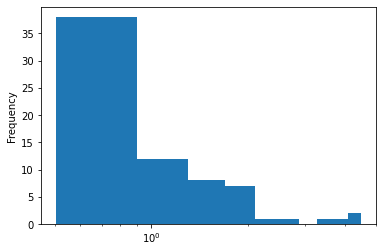

In [33]:
per_sec_0_1.plot(logx=True, kind='hist')

In [34]:
per_sec_0_1.describe()

count    71.000000
mean      1.185723
std       0.853511
min       0.504491
25%       0.626204
50%       0.880000
75%       1.424508
max       4.484444
Name: count, dtype: float64

In [56]:
symbols = price_stats[['symbol', 'count']].copy()
symbols['freq'] = symbols['count']/(24*3600)
symbols['msec'] = 1000/symbols['freq']
symbols_mft = symbols[(symbols['msec'] >= 50) & (symbols['msec'] < 3000)].sort_values(by=['msec'])